# Importiere benötigte Bibliotheken

In [141]:
import pandas as pd
import numpy as np
import ast
from collections import defaultdict, OrderedDict
import matplotlib.pyplot as plt



pd.set_option('display.max_colwidth', 50)

# Importiere das Datenset

In [142]:
dataset = pd.read_csv("./jupyterTestFrame.csv")

#Vollständiges Datenset
#dataset = pd.read_csv("./frame_v3.csv")


# Zeige die ersten 5 Zeilen des Datensets
dataset.head() # Alternative: print(dataset.head())

,patent_application_id,patent_citation_id,original_cited_patent_dnum,original_cited_patent_docNumber,original_cited_patent_country,application_claim_text,application_claim_number,extracted_paragraph_column_of_citation,actual_used_patent_dnum_application_number_for_paragraph_extraction,novelty_reducing_paragraphs
0,2500486A120120919,2500486A120120919_0001,EP2055859A1,2055859,EP,<claim-text>A roof window comprising a window...,1,"<p id=""p0001"" num=""0001"">The present inventio...",2055859,"['1', ' 23', ' 24', ' 25', ' 26', ' 27', ' 28'..."
1,2500486A120120919,2500486A120120919_0001,EP2055859A1,2055859,EP,<claim-text>The roof window according to clai...,4,"<p id=""p0001"" num=""0001"">The present inventio...",2055859,"['1', ' 23', ' 24', ' 25', ' 26', ' 27', ' 28'..."
2,2500486A120120919,2500486A120120919_0001,EP2055859A1,2055859,EP,<claim-text>The roof window according to clai...,5,"<p id=""p0001"" num=""0001"">The present inventio...",2055859,"['1', ' 23', ' 24', ' 25', ' 26', ' 27', ' 28'..."
3,2500486A120120919,2500486A120120919_0001,EP2055859A1,2055859,EP,<claim-text>The roof window according to any ...,7,"<p id=""p0001"" num=""0001"">The present inventio...",2055859,"['1', ' 23', ' 24', ' 25', ' 26', ' 27', ' 28'..."
4,2500617A120120919,2500617A120120919_0002,EP1457612A1,1457612,EP,<claim-text>A vacuum heat insulating material...,1,"<p id=""p0021"" num=""0021"">The vacuum insulatio...",1457612,"['21', ' 22', ' 23', ' 24', ' 25', ' 26', ' 27..."


# Allgemeine Statistiken

### Größe des Datensets (Anzahl Zeilen)

In [143]:
len(dataset.index)

999

### Einzigartige Einträge pro Spalte

[]

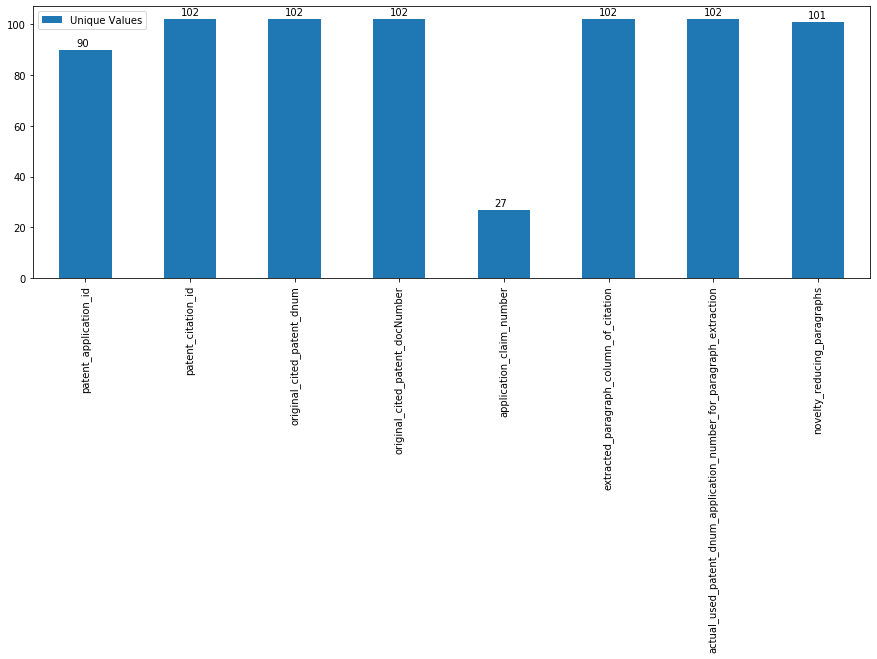

In [144]:
plotdata = [len(dataset.patent_application_id.unique()),
len(dataset.patent_citation_id.unique()),
len(dataset.original_cited_patent_dnum.unique()),
len(dataset.original_cited_patent_docNumber.unique()),
# len(dataset.original_cited_patent_country.unique()), # alles gleich, Achtung: Diese Spalte ist nicht sonderlich aussagekräftig, da sich exakte Aufzählungen wiederholen müssen
# len(dataset.application_claim_text.unique()), # fast alles unique, Achtung: Diese Spalte ist nicht sonderlich aussagekräftig, da sich exakte Aufzählungen wiederholen müssen
len(dataset.application_claim_number.unique()),
len(dataset.extracted_paragraph_column_of_citation.unique()),	
len(dataset.actual_used_patent_dnum_application_number_for_paragraph_extraction.unique()),	
len(dataset.novelty_reducing_paragraphs.unique())] # Achtung: Diese Spalte ist nicht sonderlich aussagekräftig, da sich exakte Aufzählungen wiederholen müssen

# all_labels = ['patent_application_id', 'patent_citation_id', 'original_cited_patent_dnum','original_cited_patent_docNumber','original_cited_patent_country','application_claim_text','application_claim_number','extracted_paragraph_column_of_citation','actual_used_patent_dnum_application_number_for_paragraph_extraction','novelty_reducing_paragraphs']
labels = ['patent_application_id', 'patent_citation_id', 'original_cited_patent_dnum','original_cited_patent_docNumber','application_claim_number','extracted_paragraph_column_of_citation','actual_used_patent_dnum_application_number_for_paragraph_extraction','novelty_reducing_paragraphs']

data = pd.DataFrame(plotdata, index=labels, columns=['Unique Values'])

ax = data.plot(kind="bar",use_index=True, rot=90, xticks=range(0,max(plotdata), int(max(plotdata)/10)),figsize=(15,5))               
                                              
# Annotiere die Balken zusätzlich mit ihren jeweiligen Werten als Label
for i, label in enumerate(list(data.index)):
               sum = data.loc[label]['Unique Values']
               ax.annotate(str(sum), (i-0.09, sum+1.5))
            

ax.plot(figsize=(10,50))


### Anzahl der neuheitsschädlichen Paragraphen in 'novelty_reducing_paragraphs' vs. Anzahl der extrahierten Paragraphen in 'extracted_paragraph_column_of_citation'

In [145]:
# Zähle neuheitsschädliche Paragraphen in Liste
counting_novelty_reducing_paragraphs=defaultdict(int)
for element in dataset.novelty_reducing_paragraphs.apply(ast.literal_eval):
    counting_novelty_reducing_paragraphs[len(element)] += 1

#print(counting_novelty_reducing_paragraphs)
sorted_counting_novelty_reducing_paragraphs=[(k,counting_novelty_reducing_paragraphs[k]) for k in sorted(counting_novelty_reducing_paragraphs)]
#print(sorted_counting_novelty_reducing_paragraphs)

#ACHTUNG: LÖSCHE HIER FEHLERHAFTEN WERT, DA ER BALKENDIAGRAMM ZERSCHIEßT!!!!
sorted_counting_novelty_reducing_paragraphs.remove((404520,6))
#ACHTUNG: LÖSCHE HIER FEHLERHAFTEN WERT, DA ER BALKENDIAGRAMM ZERSCHIEßT!!!!


# Zähle Anzahl tatsächlich extrahierter Paragraphen
counting_extracted_paragraph_column_of_citation=defaultdict(int)
for row in dataset.extracted_paragraph_column_of_citation:
    row_count=row.count("<p id")
    counting_extracted_paragraph_column_of_citation[row_count] += 1

#print(counting_extracted_paragraph_column_of_citation)
#print([(k, counting_extracted_paragraph_column_of_citation[k]) for k in sorted(counting_extracted_paragraph_column_of_citation, key=counting_extracted_paragraph_column_of_citation.get, reverse=False)])
sorted_counting_extracted_paragraph_column_of_citation=[(k,counting_extracted_paragraph_column_of_citation[k]) for k in sorted(counting_extracted_paragraph_column_of_citation)]

#print(sorted_counting_extracted_paragraph_column_of_citation)








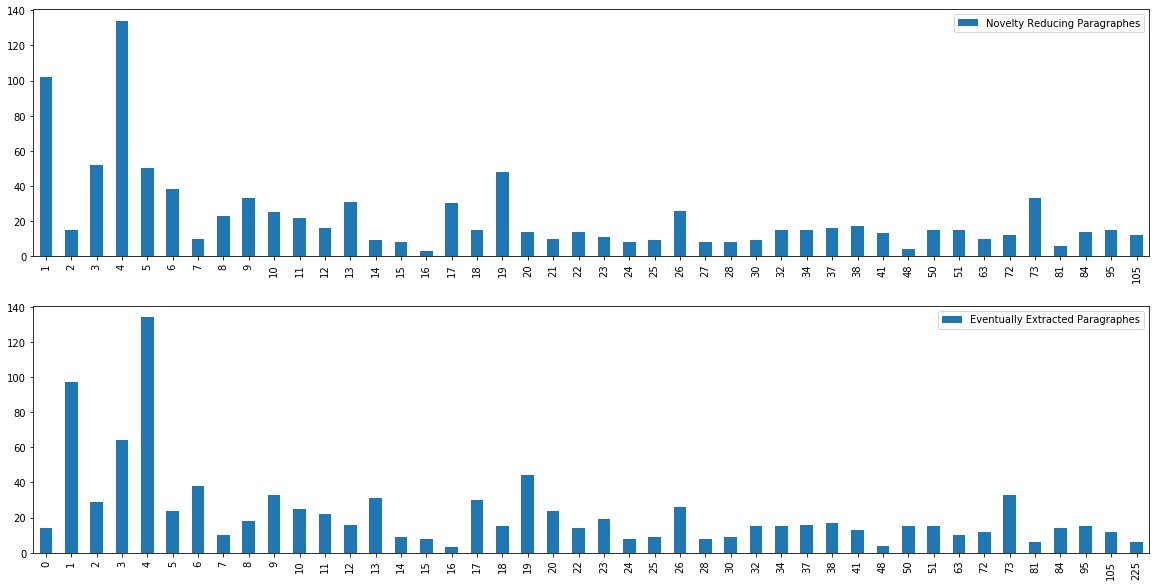

In [146]:
######################## Plot1 für novelty reducing ########################

labels = [i[0] for i in sorted_counting_novelty_reducing_paragraphs]
plotdata = [i[1] for i in sorted_counting_novelty_reducing_paragraphs]
labels2 = [i[0] for i in sorted_counting_extracted_paragraph_column_of_citation]
plotdata2 = [i[1] for i in sorted_counting_extracted_paragraph_column_of_citation]


data = pd.DataFrame(plotdata, index=labels, columns=['Novelty Reducing Paragraphes'])
#ax = data.plot(kind="bar",use_index=True, rot=90, xticks=range(0,max(plotdata), int(max(plotdata)/10)),figsize=(15,5))               


data2 = pd.DataFrame(plotdata2, index=labels2, columns=['Eventually Extracted Paragraphes'])
#ax2 = data.plot(kind="bar",use_index=True, rot=90, xticks=range(0,max(plotdata2), int(max(plotdata2)/10)),figsize=(15,5))               
                  
# Annotiere die Balken zusätzlich mit ihren jeweiligen Werten als Label
#for i, label in enumerate(list(data.index)):
  #  sum = data.loc[label]['Novelty Reducing Paragraphes']
 #   ax.annotate(str(sum), (i-1, sum+1))


fig = plt.figure()


ax = fig.add_subplot(2,1,1)
data.plot(ax=ax,kind="bar",use_index=True, rot=90, xticks=range(0,max(plotdata), int(max(plotdata)/10)),figsize=(20,10))               
#plt.title('A tale of 2 subplots')
#plt.ylabel('Damped oscillation')

ax2 = fig.add_subplot(2,1,2)
data2.plot(ax=ax2,kind="bar",use_index=True, rot=90, xticks=range(0,max(plotdata2), int(max(plotdata2)/10)),figsize=(20,10))               
#plt.xlabel('time (s)')
#plt.ylabel('Undamped')









# Funktionsdefinition

In [147]:
def groupByQuery(eintrag,eintrag_spalte):
    return dataset.groupby(eintrag_spalte).get_group(eintrag)  

# Beispiele für die Datenexploration

## Liefere alle Einträge zu einem Patentantrag (oder einem anderen Eintrag)
#### Konkret: Liefere mir alle Spalten, die zum Patentantrag '2500486A120120919' (patent_application_id) gehören.

In [148]:
# groupbyQuery(eintrag, eintrag_spalte) ist eine Funktion, die unser Datenset nach einer Spalte gruppiert, deren Namen in 
# "eintrag_spalte" übergeben wird. Anschließend werden nur jene Zeilen ausgegeben, die in der Spalte die Variable "eintrag" enthalten.
# Ein Beispiel:
result = groupByQuery("2500486A120120919", "patent_application_id")
print(result)

  patent_application_id      patent_citation_id original_cited_patent_dnum  \
0     2500486A120120919  2500486A120120919_0001                EP2055859A1   
1     2500486A120120919  2500486A120120919_0001                EP2055859A1   
2     2500486A120120919  2500486A120120919_0001                EP2055859A1   
3     2500486A120120919  2500486A120120919_0001                EP2055859A1   

   original_cited_patent_docNumber original_cited_patent_country  \
0                          2055859                            EP   
1                          2055859                            EP   
2                          2055859                            EP   
3                          2055859                            EP   

                              application_claim_text  \
0   <claim-text>A roof window comprising a window...   
1   <claim-text>The roof window according to clai...   
2   <claim-text>The roof window according to clai...   
3   <claim-text>The roof window according to

In [149]:
# Mit"result = ...." speichern wir das Ergebnis in ein Objekt, dass wir weiterverwenden können. 
# Zum Beispiel können wir nun das Ergebnis ausgeben mit print(result).  
# Möchten wir nicht alle Spalten in unserer Ausgabe erhalten, so können wir unser Ergebnis 
# kürzen. 
my_selected_columns = result[["patent_application_id","patent_citation_id","extracted_paragraph_column_of_citation"]]
print(my_selected_columns)

  patent_application_id      patent_citation_id  \
0     2500486A120120919  2500486A120120919_0001   
1     2500486A120120919  2500486A120120919_0001   
2     2500486A120120919  2500486A120120919_0001   
3     2500486A120120919  2500486A120120919_0001   

              extracted_paragraph_column_of_citation  
0   <p id="p0001" num="0001">The present inventio...  
1   <p id="p0001" num="0001">The present inventio...  
2   <p id="p0001" num="0001">The present inventio...  
3   <p id="p0001" num="0001">The present inventio...  


In [150]:
# Dies funktioniert natürlich auch für das ursprüngliche Datenset
another_selected_columns = result[["patent_application_id","application_claim_text","extracted_paragraph_column_of_citation","novelty_reducing_paragraphs"]]
print(another_selected_columns)

  patent_application_id                             application_claim_text  \
0     2500486A120120919   <claim-text>A roof window comprising a window...   
1     2500486A120120919   <claim-text>The roof window according to clai...   
2     2500486A120120919   <claim-text>The roof window according to clai...   
3     2500486A120120919   <claim-text>The roof window according to any ...   

              extracted_paragraph_column_of_citation  \
0   <p id="p0001" num="0001">The present inventio...   
1   <p id="p0001" num="0001">The present inventio...   
2   <p id="p0001" num="0001">The present inventio...   
3   <p id="p0001" num="0001">The present inventio...   

                         novelty_reducing_paragraphs  
0  ['1', ' 23', ' 24', ' 25', ' 26', ' 27', ' 28'...  
1  ['1', ' 23', ' 24', ' 25', ' 26', ' 27', ' 28'...  
2  ['1', ' 23', ' 24', ' 25', ' 26', ' 27', ' 28'...  
3  ['1', ' 23', ' 24', ' 25', ' 26', ' 27', ' 28'...  


In [151]:
# Da Werte, wie z.B. die extrahierten Paragraphen oft zu lang sind für eine gute Darstellung, werden Sie abgeschnitten.
# Dies kann abgestellt werden mit folgender Option
pd.set_option('display.max_colwidth', -1)
# Wenn wir uns nun die letzte Ausgabe erneut anzeigen:
print(another_selected_columns)

  patent_application_id  \
0  2500486A120120919      
1  2500486A120120919      
2  2500486A120120919      
3  2500486A120120919      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

## Auswahl von Zeilen mit Zeilennummerierung (Index)

In [152]:
# Da dies immer noch sehr übersichtlich ist, wollen wir nun nur die erste Zeile des Ergebnis
print(another_selected_columns.iloc[0])

patent_application_id                     2500486A120120919                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [153]:
# Oder z.B. die zweite bis vierte Zeile mithilfe der Syntax iloc[Anfang:Ende]. Beachte dabei, dass wir bei 0 
# anfangen zu zählen und das Ende-1 ausgegeben wird. Haben wir also die Zeilen 0,1,2,3,4 gibt [1:4] uns die 
# Zeilen mit dem Index 1,2,3 aus (umgangssprachlich die zweite bis vierte Zeile).
auswahl = another_selected_columns.iloc[1:4]
# Zur besseren Übersicht, schalten wir die Kurzansicht wieder ein
pd.set_option('display.max_colwidth', 50)
# Und lassen uns die Ausgabe nochmals anzeigen
print(auswahl)

  patent_application_id                             application_claim_text  \
1     2500486A120120919   <claim-text>The roof window according to clai...   
2     2500486A120120919   <claim-text>The roof window according to clai...   
3     2500486A120120919   <claim-text>The roof window according to any ...   

              extracted_paragraph_column_of_citation  \
1   <p id="p0001" num="0001">The present inventio...   
2   <p id="p0001" num="0001">The present inventio...   
3   <p id="p0001" num="0001">The present inventio...   

                         novelty_reducing_paragraphs  
1  ['1', ' 23', ' 24', ' 25', ' 26', ' 27', ' 28'...  
2  ['1', ' 23', ' 24', ' 25', ' 26', ' 27', ' 28'...  
3  ['1', ' 23', ' 24', ' 25', ' 26', ' 27', ' 28'...  


In [154]:
# Wir können auch in einzelnen Zellen suchen und uns etwaige Zeilen ausgeben lassen
# Syntax datenobject[datenobject[Spalte in der ich suche].str.contains(Suchphrase)]

# Gebe alle Zeilen aus meiner Auswahl aus, die einen Paragraphen Nummer 30 in der Spalte 'novelty_reducing_paragraphs'
# als neuheitsschädlich beinhalten
print(auswahl[auswahl['novelty_reducing_paragraphs'].str.contains("30")])

  patent_application_id                             application_claim_text  \
1     2500486A120120919   <claim-text>The roof window according to clai...   
2     2500486A120120919   <claim-text>The roof window according to clai...   
3     2500486A120120919   <claim-text>The roof window according to any ...   

              extracted_paragraph_column_of_citation  \
1   <p id="p0001" num="0001">The present inventio...   
2   <p id="p0001" num="0001">The present inventio...   
3   <p id="p0001" num="0001">The present inventio...   

                         novelty_reducing_paragraphs  
1  ['1', ' 23', ' 24', ' 25', ' 26', ' 27', ' 28'...  
2  ['1', ' 23', ' 24', ' 25', ' 26', ' 27', ' 28'...  
3  ['1', ' 23', ' 24', ' 25', ' 26', ' 27', ' 28'...  


In [155]:
# Gebe alle Zeilen aus meiner Auswahl aus, die in der Spalte 'application_claim_text' den Text "to any" beinhalten
pd.set_option('display.max_colwidth', -1) # Volle Breite zum Lesen der Inhalte
print(auswahl[auswahl['application_claim_text'].str.contains("to any")])
pd.set_option('display.max_colwidth', 50) # Zurücksetzen der Option

  patent_application_id  \
3  2500486A120120919      

                                                                                                                                                                                application_claim_text  \
3   <claim-text>The roof window according to any one of the preceding claims <b><u>characterised in that</u></b> the second bracket member (32) is provided with at least one flap (322).</claim-text>   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

# Ausgabe in andere Dateiformate

### Nun haben wir eine mögliche interessante Auswahl getroffen und wollen sie wiederum in ein anderes Ausgabeformat exportieren, um sie weiterzuverwenden oder zu speichern.


## CSV Export

In [156]:
# Syntax: nameDesObjekts.to_csv(dateipfad+Name, index=false)
# Nach Ausführung dieses Feldes wird die Datei im gleichen Verzeichnis wie dieses Notebook erstellt. 
# Es wird keine zusätzliche Bestätigung ausgegeben.
# Die verkürzte Schreibweise betrifft nur die Anzeige, es werden also immer vollständige Daten in Dateien geschrieben. 
auswahl.to_csv("./data_out.csv",index=False)

## HTML Export

In [157]:
# Syntax: nameDesObjekts.to_html(dateipfad+Name, index=false)
auswahl.to_html('./data_out.html', index=False)